In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
# Load both files
df_parquet = pd.read_csv("lightcurve_features_26_negative.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")

In [18]:
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
# Shuffle all rows
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
combined.to_parquet("baseline set with all neg and 100 pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'baseline set with all neg and 100 pos.parquet'")
print("Total rows:", len(combined))

Combined and shuffled dataset saved as 'baseline set with all neg and 100 pos.parquet'
Total rows: 1571


In [20]:
df_combined_baseline = pd.read_parquet("baseline set with all neg and 100 pos.parquet")
features_combined_baseline = df_combined_baseline .drop(columns=['object'])
corr_combined_baseline = features_combined_baseline.corr()

In [21]:
df_combined_baseline

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,ZTF18abbrikh,16.104658,16.079719,0.275773,16.110229,0.691751,0.280480,0.223662,0.665586,-0.943915,...,0.744480,651.894741,0.228996,0.087176,0.706575,0.017124,34.641464,286.046599,-0.114433,0.886735
1,ZTF18aayofec,18.284940,17.232688,1.134601,18.868792,2.270712,0.361605,0.292773,3.069963,-0.884689,...,0.634668,551.500895,0.657377,0.363324,3.056760,0.062051,70.756626,821.288483,-0.586882,0.903019
2,ZTF18aazfeju,15.171564,15.159009,0.181192,15.170848,0.650220,0.278806,0.187474,0.406838,-0.250757,...,0.784730,739.187643,0.147596,0.161692,0.830567,0.011943,33.423127,78.529824,0.226995,0.844526
3,ZTF18adjmyuq,15.976566,15.951539,0.214719,15.986678,0.833680,0.386419,0.210536,0.489179,-0.491081,...,0.867378,706.746592,0.187393,0.219078,1.047107,0.013440,36.218583,195.238960,0.065449,0.856172
4,ZTF20aanlcpd,18.650733,18.591911,0.214695,18.737732,0.522768,0.343625,0.425178,0.569489,-0.806568,...,0.710384,369.599590,0.083839,0.367639,0.566807,0.011511,90.759503,27.144515,-0.597097,0.904202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,ZTF18abrrzeq,17.364388,17.335678,0.202778,17.408093,0.858205,0.316740,0.308967,0.570480,1.000957,...,0.488363,583.165123,0.087821,0.497265,1.072328,0.011678,35.709418,76.886510,0.121359,0.795542
1567,ZTF18abjartz,16.276459,16.266405,0.187004,16.227710,0.883832,0.314081,0.224566,0.520515,0.647527,...,0.595561,333.049997,0.083885,0.509351,1.255658,0.011489,49.548507,76.328801,0.526362,0.772414
1568,ZTF18abareij,16.179850,16.174791,0.140425,16.186563,0.568323,0.325492,0.163742,0.365974,0.630992,...,0.642558,1108.935013,0.080962,0.441466,0.653109,0.008679,27.279678,59.177617,-0.531466,0.728493
1569,ZTF18abdktfs,15.533986,15.508577,0.411432,15.650111,1.141420,0.320052,0.170971,1.042116,-0.451241,...,0.677081,1797.235556,0.328679,0.251470,1.153958,0.026486,12.211495,423.258197,-0.130320,0.852060


In [22]:
features_combined_baseline

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,16.104658,16.079719,0.275773,16.110229,0.691751,0.280480,0.223662,0.665586,-0.943915,0.000123,...,0.744480,651.894741,0.228996,0.087176,0.706575,0.017124,34.641464,286.046599,-0.114433,0.886735
1,18.284940,17.232688,1.134601,18.868792,2.270712,0.361605,0.292773,3.069963,-0.884689,0.000169,...,0.634668,551.500895,0.657377,0.363324,3.056760,0.062051,70.756626,821.288483,-0.586882,0.903019
2,15.171564,15.159009,0.181192,15.170848,0.650220,0.278806,0.187474,0.406838,-0.250757,0.000055,...,0.784730,739.187643,0.147596,0.161692,0.830567,0.011943,33.423127,78.529824,0.226995,0.844526
3,15.976566,15.951539,0.214719,15.986678,0.833680,0.386419,0.210536,0.489179,-0.491081,-0.000076,...,0.867378,706.746592,0.187393,0.219078,1.047107,0.013440,36.218583,195.238960,0.065449,0.856172
4,18.650733,18.591911,0.214695,18.737732,0.522768,0.343625,0.425178,0.569489,-0.806568,0.000194,...,0.710384,369.599590,0.083839,0.367639,0.566807,0.011511,90.759503,27.144515,-0.597097,0.904202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,17.364388,17.335678,0.202778,17.408093,0.858205,0.316740,0.308967,0.570480,1.000957,0.000145,...,0.488363,583.165123,0.087821,0.497265,1.072328,0.011678,35.709418,76.886510,0.121359,0.795542
1567,16.276459,16.266405,0.187004,16.227710,0.883832,0.314081,0.224566,0.520515,0.647527,-0.000060,...,0.595561,333.049997,0.083885,0.509351,1.255658,0.011489,49.548507,76.328801,0.526362,0.772414
1568,16.179850,16.174791,0.140425,16.186563,0.568323,0.325492,0.163742,0.365974,0.630992,-0.000027,...,0.642558,1108.935013,0.080962,0.441466,0.653109,0.008679,27.279678,59.177617,-0.531466,0.728493
1569,15.533986,15.508577,0.411432,15.650111,1.141420,0.320052,0.170971,1.042116,-0.451241,0.000090,...,0.677081,1797.235556,0.328679,0.251470,1.153958,0.026486,12.211495,423.258197,-0.130320,0.852060


In [23]:
corr_combined_baseline

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
mean,1.000000,0.975702,0.337912,0.991679,0.269312,0.108596,0.064146,0.327027,-0.166912,0.027534,...,0.018959,-0.026170,0.287106,-0.269897,0.221502,0.252839,-0.019413,-0.055595,-0.284220,0.254731
weighted_mean,0.975702,1.000000,0.164851,0.962911,0.109169,0.087570,0.061213,0.157644,-0.157623,0.024023,...,0.007902,-0.061966,0.130473,-0.231826,0.068275,0.085952,-0.046891,-0.154523,-0.273158,0.189893
standard_deviation,0.337912,0.164851,1.000000,0.341706,0.899983,0.181610,0.000963,0.991379,-0.165239,0.025970,...,0.043141,0.132073,0.902986,-0.357232,0.825831,0.993109,0.158244,0.725380,-0.163505,0.376552
median,0.991679,0.962911,0.341706,1.000000,0.271495,0.112847,0.063280,0.331515,-0.164068,0.063393,...,0.021525,-0.026282,0.289028,-0.268527,0.224493,0.256952,-0.021149,-0.028014,-0.311267,0.271189
amplitude,0.269312,0.109169,0.899983,0.271495,1.000000,0.000093,-0.109066,0.883939,0.031849,0.029694,...,-0.062450,0.221270,0.770794,-0.072156,0.960166,0.893441,0.130234,0.642643,-0.053842,0.180662
beyond_1_std,0.108596,0.087570,0.181610,0.112847,0.000093,1.000000,0.363094,0.210750,-0.324663,0.018024,...,0.575161,-0.008386,0.391524,-0.588917,-0.098176,0.183551,-0.284256,0.134902,-0.301012,0.612884
cusum,0.064146,0.061213,0.000963,0.063280,-0.109066,0.363094,1.000000,-0.007756,-0.073245,0.008537,...,0.515409,-0.077507,0.070640,-0.256851,-0.098789,-0.006385,-0.014699,-0.005351,-0.103256,0.445575
inter_percentile_range_10,0.327027,0.157644,0.991379,0.331515,0.883939,0.210750,-0.007756,1.000000,-0.175126,0.034922,...,0.019227,0.122433,0.899415,-0.363343,0.800317,0.985971,0.121548,0.722014,-0.174376,0.387470
kurtosis,-0.166912,-0.157623,-0.165239,-0.164068,0.031849,-0.324663,-0.073245,-0.175126,1.000000,-0.001092,...,-0.022243,0.086827,-0.160388,0.514668,0.118019,-0.162531,0.047781,-0.098655,0.513113,-0.414322
linear_trend,0.027534,0.024023,0.025970,0.063393,0.029694,0.018024,0.008537,0.034922,-0.001092,1.000000,...,-0.008386,-0.021800,0.061882,-0.028372,0.006732,0.017917,-0.052762,0.022322,-0.080037,0.029572


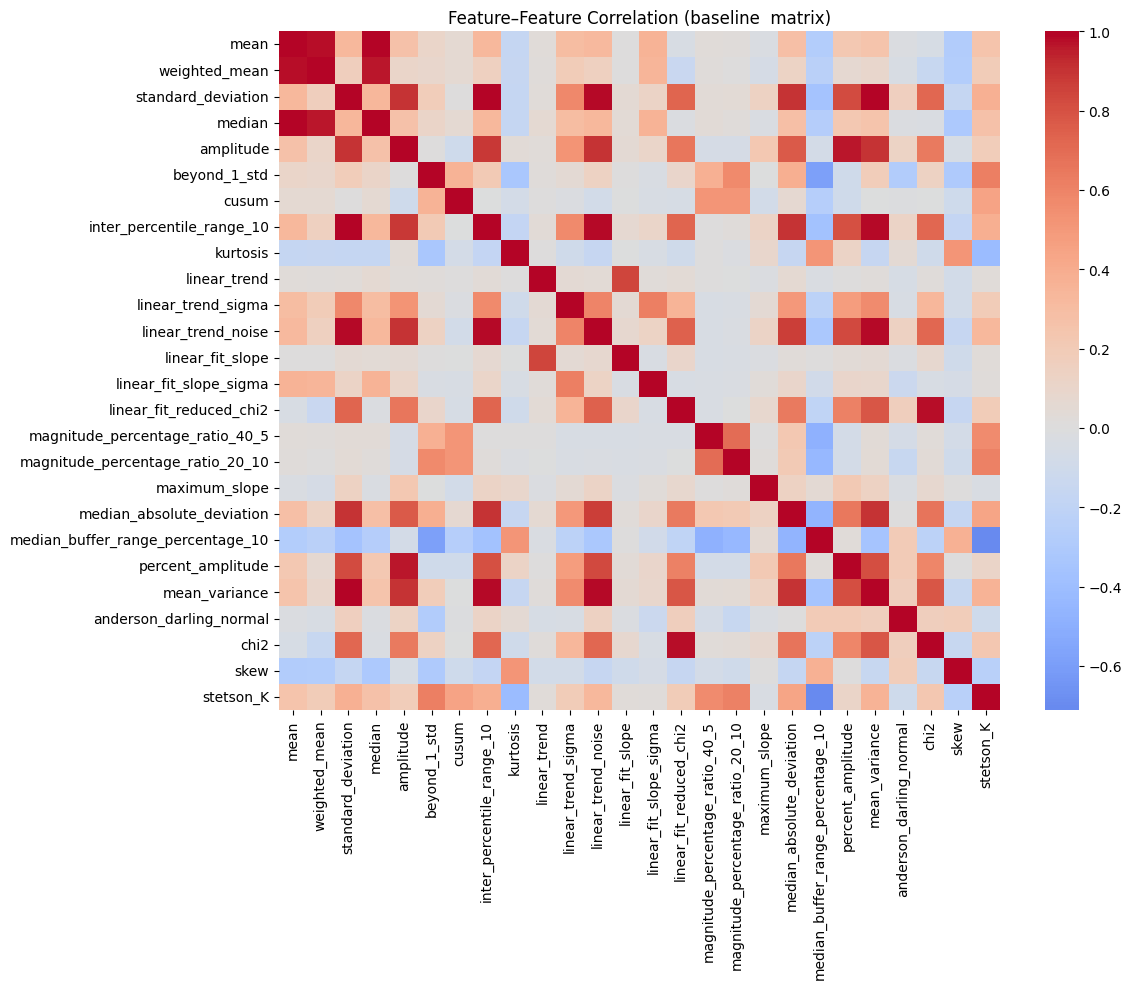

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_combined_baseline, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (baseline  matrix)')
plt.tight_layout()
plt.show()

In [25]:
neg_files = sorted(glob.glob("negative_subset_*.parquet"))

In [27]:
print (neg_files)

['negative_subset_1.parquet', 'negative_subset_10.parquet', 'negative_subset_11.parquet', 'negative_subset_2.parquet', 'negative_subset_3.parquet', 'negative_subset_4.parquet', 'negative_subset_5.parquet', 'negative_subset_6.parquet', 'negative_subset_7.parquet', 'negative_subset_8.parquet', 'negative_subset_9.parquet', 'negative_subset_noise_points.parquet']


In [29]:
# Store sampled dataframes
sampled_list = []
#print (sampled_list)

In [30]:
for f in neg_files:
    df = pd.read_parquet(f)
# Randomly sample 35 rows (or all if file has <10)
    #n = min(100, len(df))
    #n=max(100, len(df))
    n=len(df)
    print(n)
    sampled = df.sample(n, random_state=42)
    sampled_list.append(sampled)
    #print(f"Sampled {n} rows from {f}"
combined_df = pd.concat(sampled_list, ignore_index=True)
# Shuffle the combined data 
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Save to new parquet
combined_df.to_parquet("negative_combined_all.parquet", index=False)


100
100
100
100
100
100
100
100
100
100
100
366


In [31]:
import pandas as pd

# Load both files
df_parquet = pd.read_parquet("negative_combined_all.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined.to_parquet("subset of baseline with allneg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with allneg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with allneg & pos.parquet'
Total rows: 1566


In [32]:
df_parquet

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster
0,ZTF18abaixud,15.254409,15.002403,1.215253,15.146256,2.050862,0.488313,0.223234,3.376298,-1.217323,...,432.244277,1.244574,0.230575,2.093864,0.079666,43.448047,4233.705337,-0.243635,0.850254,-1
1,ZTF18abgybwn,15.496750,15.321343,0.972581,15.306947,2.283591,0.328829,0.179713,2.647067,-0.484464,...,384.749161,0.645160,0.274131,2.299208,0.062760,12.928204,2106.147502,0.084827,0.788825,6
2,ZTF18abarcsa,18.507061,17.241269,1.119125,18.699999,2.377338,0.311485,0.185830,3.209219,0.186609,...,1667.142417,0.492254,0.351821,2.984475,0.060470,95.461682,1419.796697,-1.047052,0.922748,-1
3,ZTF18abaqbzy,17.768075,17.683088,0.330559,17.718870,0.903527,0.263965,0.314342,0.870911,0.569928,...,201.508709,0.246017,0.319277,1.405636,0.018604,72.471907,115.745384,1.108105,0.812953,1
4,ZTF18aayofec,18.284940,17.232688,1.134601,18.868792,2.270712,0.361605,0.292773,3.069963,-0.884689,...,551.500895,0.657377,0.363324,3.056760,0.062051,70.756626,821.288483,-0.586882,0.903019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,ZTF18aawkneh,16.401796,15.938038,1.083485,16.321598,2.392891,0.534252,0.229053,2.559660,-1.410349,...,933.561122,1.025895,0.065525,3.144646,0.066059,125.979098,2286.627583,0.231154,0.944926,-1
1462,ZTF18aazuxop,16.380364,15.966092,1.088220,16.047491,2.104604,0.408098,0.247785,2.893981,-0.876541,...,985.465837,0.857139,0.082905,2.708074,0.066434,34.521670,1536.934653,0.494570,0.872487,-1
1463,ZTF18abchmws,18.288208,16.905592,1.208226,18.695475,2.365181,0.326087,0.237308,3.399606,0.010482,...,568.612742,0.651842,0.155468,3.556677,0.066066,61.388720,1384.590809,-1.003587,0.908982,9
1464,ZTF18abyvokd,15.188215,15.182290,0.171112,15.251856,1.324175,0.364099,0.419901,0.412816,4.285011,...,669.491346,0.104839,0.587524,1.661679,0.011266,53.667911,47.701884,-0.691866,0.867262,-1


In [33]:
df_parquet_1=pd.read_parquet('subset of baseline with allneg & pos.parquet')

In [34]:
df_parquet_1

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster
0,ZTF18abaixud,15.254409,15.002403,1.215253,15.146256,2.050862,0.488313,0.223234,3.376298,-1.217323,...,432.244277,1.244574,0.230575,2.093864,0.079666,43.448047,4233.705337,-0.243635,0.850254,-1.0
1,ZTF18abgybwn,15.496750,15.321343,0.972581,15.306947,2.283591,0.328829,0.179713,2.647067,-0.484464,...,384.749161,0.645160,0.274131,2.299208,0.062760,12.928204,2106.147502,0.084827,0.788825,6.0
2,ZTF18abarcsa,18.507061,17.241269,1.119125,18.699999,2.377338,0.311485,0.185830,3.209219,0.186609,...,1667.142417,0.492254,0.351821,2.984475,0.060470,95.461682,1419.796697,-1.047052,0.922748,-1.0
3,ZTF18abaqbzy,17.768075,17.683088,0.330559,17.718870,0.903527,0.263965,0.314342,0.870911,0.569928,...,201.508709,0.246017,0.319277,1.405636,0.018604,72.471907,115.745384,1.108105,0.812953,1.0
4,ZTF18aayofec,18.284940,17.232688,1.134601,18.868792,2.270712,0.361605,0.292773,3.069963,-0.884689,...,551.500895,0.657377,0.363324,3.056760,0.062051,70.756626,821.288483,-0.586882,0.903019,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,V418 Gem,16.905293,16.891739,0.130254,16.905872,0.641553,0.319716,0.146000,0.328610,0.831722,...,679.331641,0.087836,0.388099,0.741325,0.007705,0.198451,59.169751,-0.083027,0.789198,NaN
1562,V677 And,19.227544,18.342081,0.989385,19.060970,2.745060,0.425414,0.429222,2.542357,-1.123188,...,789.621964,0.868201,0.143646,2.862148,0.051457,16.202306,199.179353,0.269137,0.853870,NaN
1563,V2306 Cyg,15.869141,15.860906,0.180194,15.848884,1.344455,0.201835,0.180301,0.363799,34.378112,...,2868.198512,0.094182,0.677982,2.232877,0.011355,19.465335,79.962911,3.661152,0.732837,NaN
1564,IL Leo,18.458933,17.494483,0.926653,18.622186,1.716861,0.440613,0.290478,2.460330,-1.174519,...,848.642852,0.697933,0.159004,1.914783,0.050201,10.833990,352.659253,-0.240478,0.948347,NaN


In [36]:
df_combined_baseline_subset_all = pd.read_parquet("subset of baseline with allneg & pos.parquet")
features_combined_baseline_subset_all = df_combined_baseline_subset_all .drop(columns=['object','cluster'])#errors='ignore')
#features_combined_baseline_subset_all_numeric = features_combined_baseline_subset_all.select_dtypes(include='number')
corr_combined_baseline_subset_all = features_combined_baseline_subset_all.corr()

In [37]:
features_combined_baseline_subset_all

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,15.254409,15.002403,1.215253,15.146256,2.050862,0.488313,0.223234,3.376298,-1.217323,0.000145,...,0.823933,432.244277,1.244574,0.230575,2.093864,0.079666,43.448047,4233.705337,-0.243635,0.850254
1,15.496750,15.321343,0.972581,15.306947,2.283591,0.328829,0.179713,2.647067,-0.484464,0.000138,...,0.671567,384.749161,0.645160,0.274131,2.299208,0.062760,12.928204,2106.147502,0.084827,0.788825
2,18.507061,17.241269,1.119125,18.699999,2.377338,0.311485,0.185830,3.209219,0.186609,-0.000154,...,0.557956,1667.142417,0.492254,0.351821,2.984475,0.060470,95.461682,1419.796697,-1.047052,0.922748
3,17.768075,17.683088,0.330559,17.718870,0.903527,0.263965,0.314342,0.870911,0.569928,-0.000117,...,0.607360,201.508709,0.246017,0.319277,1.405636,0.018604,72.471907,115.745384,1.108105,0.812953
4,18.284940,17.232688,1.134601,18.868792,2.270712,0.361605,0.292773,3.069963,-0.884689,0.000169,...,0.634668,551.500895,0.657377,0.363324,3.056760,0.062051,70.756626,821.288483,-0.586882,0.903019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,16.905293,16.891739,0.130254,16.905872,0.641553,0.319716,0.146000,0.328610,0.831722,0.000015,...,0.673249,679.331641,0.087836,0.388099,0.741325,0.007705,0.198451,59.169751,-0.083027,0.789198
1562,19.227544,18.342081,0.989385,19.060970,2.745060,0.425414,0.429222,2.542357,-1.123188,0.001677,...,0.796496,789.621964,0.868201,0.143646,2.862148,0.051457,16.202306,199.179353,0.269137,0.853870
1563,15.869141,15.860906,0.180194,15.848884,1.344455,0.201835,0.180301,0.363799,34.378112,-0.000084,...,0.628867,2868.198512,0.094182,0.677982,2.232877,0.011355,19.465335,79.962911,3.661152,0.732837
1564,18.458933,17.494483,0.926653,18.622186,1.716861,0.440613,0.290478,2.460330,-1.174519,-0.000023,...,0.813309,848.642852,0.697933,0.159004,1.914783,0.050201,10.833990,352.659253,-0.240478,0.948347


In [38]:
corr_combined_baseline_subset_all

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
mean,1.000000,0.969474,0.449837,0.987364,0.404052,0.257316,0.014580,0.446489,-0.273154,-0.074195,...,0.019458,-0.004793,0.374020,-0.348069,0.351793,0.351480,-0.124223,-0.074063,-0.420871,0.423412
weighted_mean,0.969474,1.000000,0.271277,0.945014,0.240139,0.182035,-0.007078,0.272261,-0.255310,-0.026971,...,-0.026428,-0.035192,0.208282,-0.278230,0.194106,0.177676,-0.096992,-0.181147,-0.385688,0.314741
standard_deviation,0.449837,0.271277,1.000000,0.468707,0.911001,0.454638,0.049990,0.989175,-0.318518,-0.087100,...,0.145493,0.033102,0.892925,-0.551063,0.834917,0.991707,-0.163842,0.686244,-0.417721,0.575349
median,0.987364,0.945014,0.468707,1.000000,0.420517,0.272000,0.014909,0.465242,-0.266385,-0.064422,...,0.034171,-0.006867,0.390920,-0.356177,0.370482,0.371197,-0.135046,-0.024390,-0.450475,0.455887
amplitude,0.404052,0.240139,0.911001,0.420517,1.000000,0.311411,-0.067109,0.902261,-0.135341,-0.073510,...,0.063224,0.108635,0.775651,-0.340979,0.948371,0.901645,-0.228381,0.626130,-0.323894,0.428554
beyond_1_std,0.257316,0.182035,0.454638,0.272000,0.311411,1.000000,0.271752,0.463803,-0.365463,-0.129783,...,0.560178,0.038465,0.616519,-0.717847,0.180067,0.449474,-0.507979,0.272862,-0.469788,0.693924
cusum,0.014580,-0.007078,0.049990,0.014909,-0.067109,0.271752,1.000000,0.022421,0.026952,0.034398,...,0.561254,0.007037,0.143853,-0.253599,-0.028671,0.044807,-0.099380,0.002689,-0.006888,0.420359
inter_percentile_range_10,0.446489,0.272261,0.989175,0.465242,0.902261,0.463803,0.022421,1.000000,-0.324033,-0.072550,...,0.092575,0.017339,0.870761,-0.534810,0.816137,0.980921,-0.186253,0.679093,-0.428116,0.570381
kurtosis,-0.273154,-0.255310,-0.318518,-0.266385,-0.135341,-0.365463,0.026952,-0.324033,1.000000,0.007847,...,0.097879,0.117384,-0.270231,0.529230,-0.033591,-0.315322,-0.037964,-0.189328,0.620644,-0.377980
linear_trend,-0.074195,-0.026971,-0.087100,-0.064422,-0.073510,-0.129783,0.034398,-0.072550,0.007847,1.000000,...,-0.094407,-0.062636,-0.059730,-0.014669,-0.073151,-0.075543,-0.001257,-0.012016,-0.002947,-0.055679


In [57]:
#corr_diff =corr_combined_baseline_subset_all.abs()-corr_combined_baseline.abs()

In [75]:
corr_diff_1 = (corr_combined_baseline_subset_all - corr_combined_baseline)


In [76]:
corr_diff_1

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
mean,0.000000,-0.006228,0.111926,-0.004315,0.134740,0.148720,-0.049565,0.119462,-0.106242,-0.101729,...,0.000500,0.021377,0.086914,-0.078172,0.130291,0.098641,-0.104810,-0.018468,-0.136651,0.168681
weighted_mean,-0.006228,0.000000,0.106426,-0.017897,0.130970,0.094465,-0.068291,0.114617,-0.097688,-0.050993,...,-0.034329,0.026774,0.077809,-0.046404,0.125831,0.091725,-0.050101,-0.026624,-0.112530,0.124848
standard_deviation,0.111926,0.106426,0.000000,0.127001,0.011019,0.273027,0.049027,-0.002204,-0.153280,-0.113070,...,0.102352,-0.098972,-0.010061,-0.193831,0.009086,-0.001402,-0.322086,-0.039137,-0.254216,0.198798
median,-0.004315,-0.017897,0.127001,0.000000,0.149022,0.159153,-0.048370,0.133728,-0.102317,-0.127815,...,0.012647,0.019415,0.101892,-0.087650,0.145990,0.114245,-0.113898,0.003624,-0.139208,0.184698
amplitude,0.134740,0.130970,0.011019,0.149022,0.000000,0.311318,0.041957,0.018322,-0.167190,-0.103204,...,0.125674,-0.112635,0.004857,-0.268824,-0.011795,0.008205,-0.358616,-0.016514,-0.270052,0.247892
beyond_1_std,0.148720,0.094465,0.273027,0.159153,0.311318,0.000000,-0.091342,0.253054,-0.040800,-0.147807,...,-0.014983,0.046851,0.224994,-0.128930,0.278243,0.265923,-0.223723,0.137960,-0.168776,0.081040
cusum,-0.049565,-0.068291,0.049027,-0.048370,0.041957,-0.091342,0.000000,0.030177,0.100198,0.025861,...,0.045845,0.084545,0.073213,0.003252,0.070118,0.051192,-0.084681,0.008040,0.096368,-0.025216
inter_percentile_range_10,0.119462,0.114617,-0.002204,0.133728,0.018322,0.253054,0.030177,0.000000,-0.148907,-0.107473,...,0.073348,-0.105094,-0.028654,-0.171467,0.015820,-0.005050,-0.307801,-0.042921,-0.253740,0.182911
kurtosis,-0.106242,-0.097688,-0.153280,-0.102317,-0.167190,-0.040800,0.100198,-0.148907,0.000000,0.008939,...,0.120122,0.030557,-0.109843,0.014562,-0.151610,-0.152791,-0.085746,-0.090673,0.107531,0.036341
linear_trend,-0.101729,-0.050993,-0.113070,-0.127815,-0.103204,-0.147807,0.025861,-0.107473,0.008939,0.000000,...,-0.086021,-0.040836,-0.121612,0.013704,-0.079883,-0.093459,0.051505,-0.034339,0.077090,-0.085251


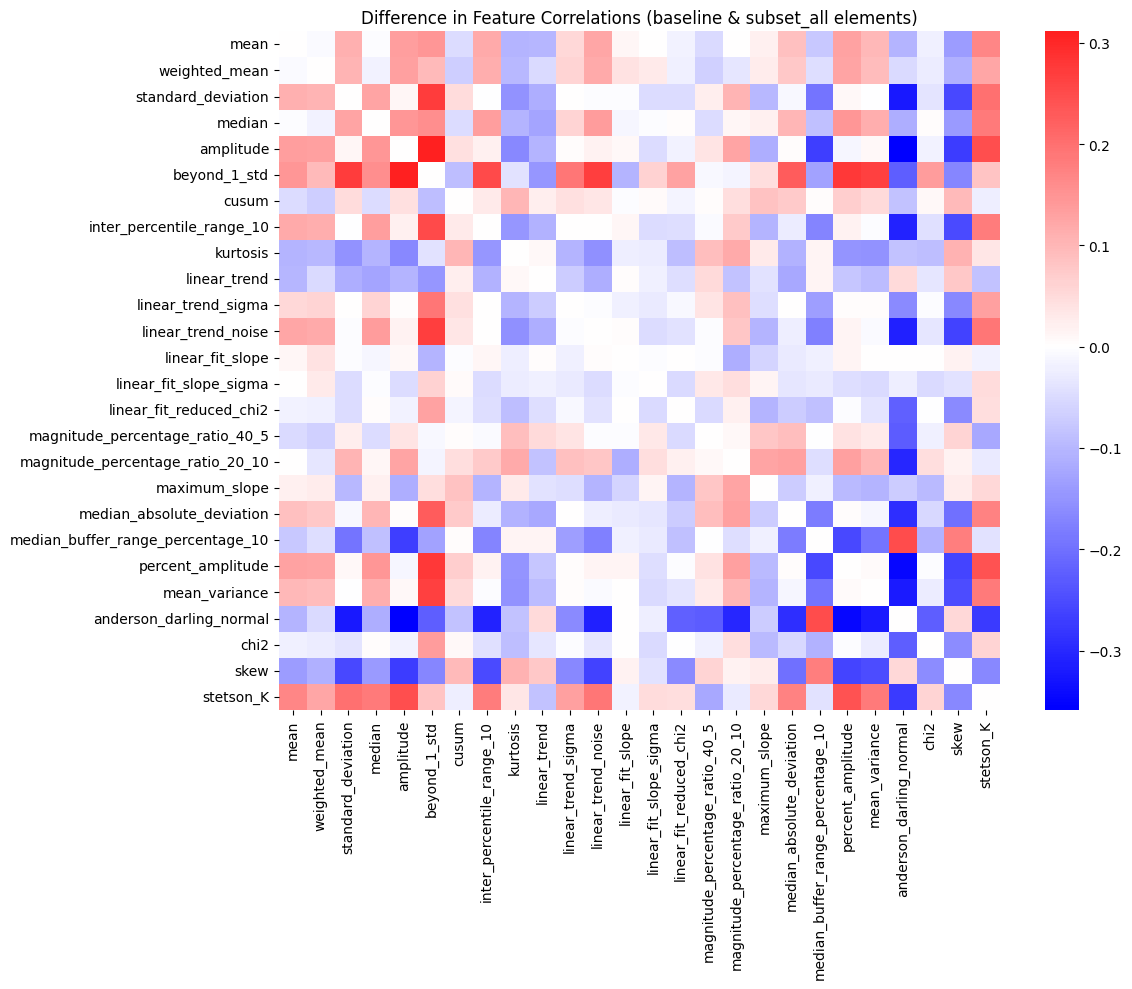

In [78]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_1, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (baseline & subset_all elements)')
plt.tight_layout()
plt.show()


In [79]:
corr_diff_clean = corr_diff_1.copy()
corr_diff_clean[np.abs(corr_diff_clean) < 1e-6] = 0

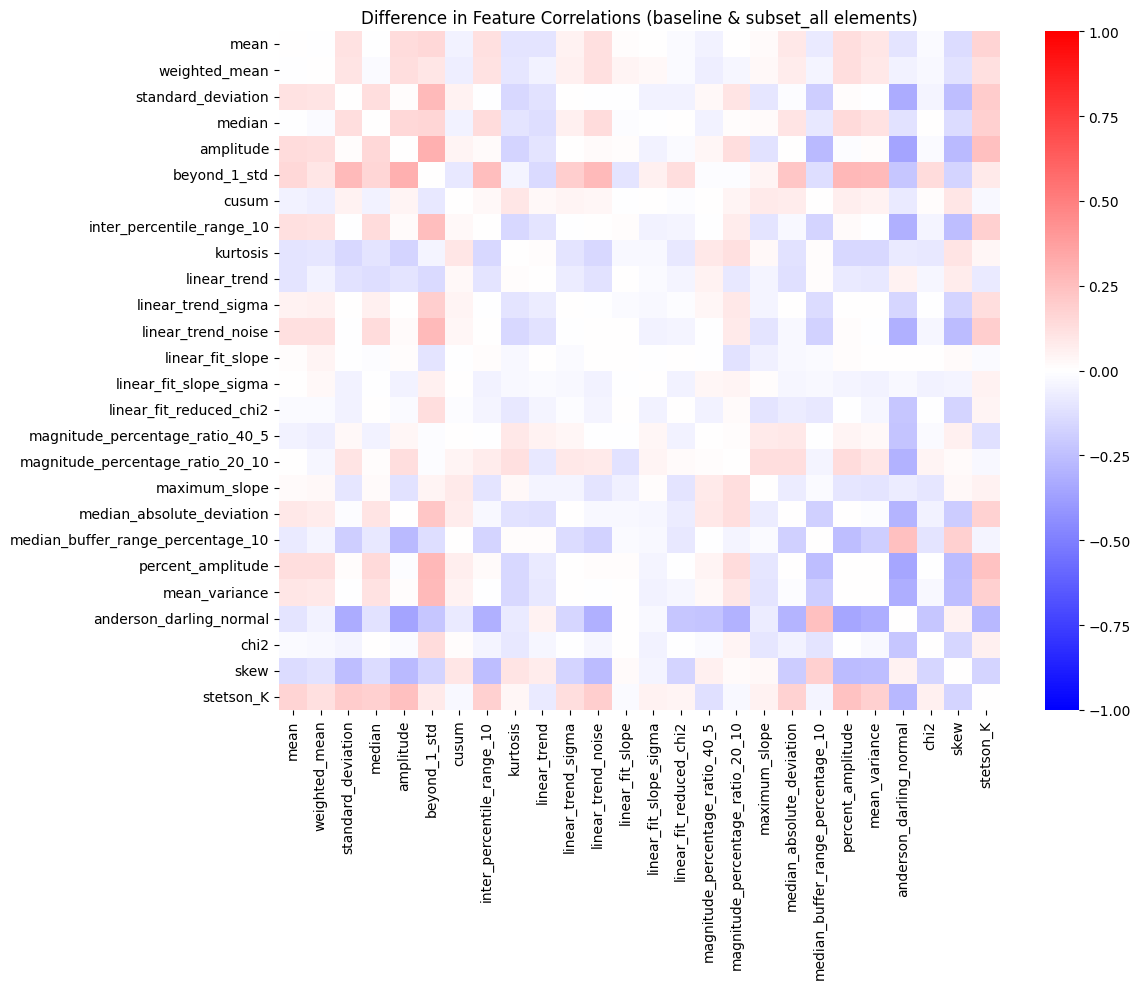

In [80]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean, cmap='bwr', center=0, vmin=-1, vmax=1)
plt.title('Difference in Feature Correlations (baseline & subset_all elements)')
plt.tight_layout()
plt.show()


In [53]:
df_neg = pd.read_parquet(
    r"D:\Mcvs_clermont\current working directory\cluster_groups\subset of baseline with allneg & pos.parquet"
)

In [54]:
df_neg

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18abachuh,13.602756,13.600786,0.194167,13.551601,1.594529,0.289233,0.235493,0.475948,21.593521,...,0.088227,0.675258,2.727737,0.014274,49.220222,247.748572,2.059456,0.775113,1.0,1
1,ZTF18abebodz,15.655397,15.658733,0.238821,15.638908,0.669037,0.248913,0.253131,0.456102,1.399115,...,0.146764,0.112500,0.844150,0.015255,53.605864,154.069571,-0.812027,0.820224,1.0,1
2,ZTF18aaxyujl,15.917386,15.915512,0.098416,15.912807,0.389504,0.495868,0.381108,0.246597,-1.035860,...,0.095315,0.196143,0.434883,0.006183,51.271482,31.394575,0.174029,0.885085,1.0,1
3,ZTF18abfjmbl,16.087413,16.085389,0.086521,16.053020,0.543823,0.349215,0.395872,0.218258,1.683706,...,0.052219,0.517596,0.744381,0.005378,64.653136,32.439946,0.706887,0.869402,1.0,1
4,ZTF18aayofec,18.284940,17.232688,1.134601,18.868792,2.270712,0.361605,0.292773,3.069963,-0.884689,...,0.657377,0.363324,3.056760,0.062051,70.756626,821.288483,-0.586882,0.903019,9.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,V418 Gem,16.905293,16.891739,0.130254,16.905872,0.641553,0.319716,0.146000,0.328610,0.831722,...,0.087836,0.388099,0.741325,0.007705,0.198451,59.169751,-0.083027,0.789198,NaN,None
1567,V677 And,19.227544,18.342081,0.989385,19.060970,2.745060,0.425414,0.429222,2.542357,-1.123188,...,0.868201,0.143646,2.862148,0.051457,16.202306,199.179353,0.269137,0.853870,NaN,None
1568,V2306 Cyg,15.869141,15.860906,0.180194,15.848884,1.344455,0.201835,0.180301,0.363799,34.378112,...,0.094182,0.677982,2.232877,0.011355,19.465335,79.962911,3.661152,0.732837,NaN,None
1569,IL Leo,18.458933,17.494483,0.926653,18.622186,1.716861,0.440613,0.290478,2.460330,-1.174519,...,0.697933,0.159004,1.914783,0.050201,10.833990,352.659253,-0.240478,0.948347,NaN,None


In [77]:
#df_combined_baseline_subset_all = pd.read_parquet("subset of baseline with allneg & pos.parquet")
features_neg = df_neg .drop(columns=['object','cluster','cluster_id'])#errors='ignore')
#features_combined_baseline_subset_all_numeric = features_combined_baseline_subset_all.select_dtypes(include='number')
corr_neg = features_neg.corr()

In [61]:
features_neg

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,13.602756,13.600786,0.194167,13.551601,1.594529,0.289233,0.235493,0.475948,21.593521,0.000099,...,0.691962,219.923903,0.088227,0.675258,2.727737,0.014274,49.220222,247.748572,2.059456,0.775113
1,15.655397,15.658733,0.238821,15.638908,0.669037,0.248913,0.253131,0.456102,1.399115,-0.000108,...,0.842541,219.414192,0.146764,0.112500,0.844150,0.015255,53.605864,154.069571,-0.812027,0.820224
2,15.917386,15.915512,0.098416,15.912807,0.389504,0.495868,0.381108,0.246597,-1.035860,-0.000090,...,0.867072,584.065041,0.095315,0.196143,0.434883,0.006183,51.271482,31.394575,0.174029,0.885085
3,16.087413,16.085389,0.086521,16.053020,0.543823,0.349215,0.395872,0.218258,1.683706,0.000077,...,0.791616,359.137470,0.052219,0.517596,0.744381,0.005378,64.653136,32.439946,0.706887,0.869402
4,18.284940,17.232688,1.134601,18.868792,2.270712,0.361605,0.292773,3.069963,-0.884689,0.000169,...,0.634668,551.500895,0.657377,0.363324,3.056760,0.062051,70.756626,821.288483,-0.586882,0.903019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,16.905293,16.891739,0.130254,16.905872,0.641553,0.319716,0.146000,0.328610,0.831722,0.000015,...,0.673249,679.331641,0.087836,0.388099,0.741325,0.007705,0.198451,59.169751,-0.083027,0.789198
1567,19.227544,18.342081,0.989385,19.060970,2.745060,0.425414,0.429222,2.542357,-1.123188,0.001677,...,0.796496,789.621964,0.868201,0.143646,2.862148,0.051457,16.202306,199.179353,0.269137,0.853870
1568,15.869141,15.860906,0.180194,15.848884,1.344455,0.201835,0.180301,0.363799,34.378112,-0.000084,...,0.628867,2868.198512,0.094182,0.677982,2.232877,0.011355,19.465335,79.962911,3.661152,0.732837
1569,18.458933,17.494483,0.926653,18.622186,1.716861,0.440613,0.290478,2.460330,-1.174519,-0.000023,...,0.813309,848.642852,0.697933,0.159004,1.914783,0.050201,10.833990,352.659253,-0.240478,0.948347


In [71]:
corr_diff_2=(corr_neg - corr_combined_baseline)


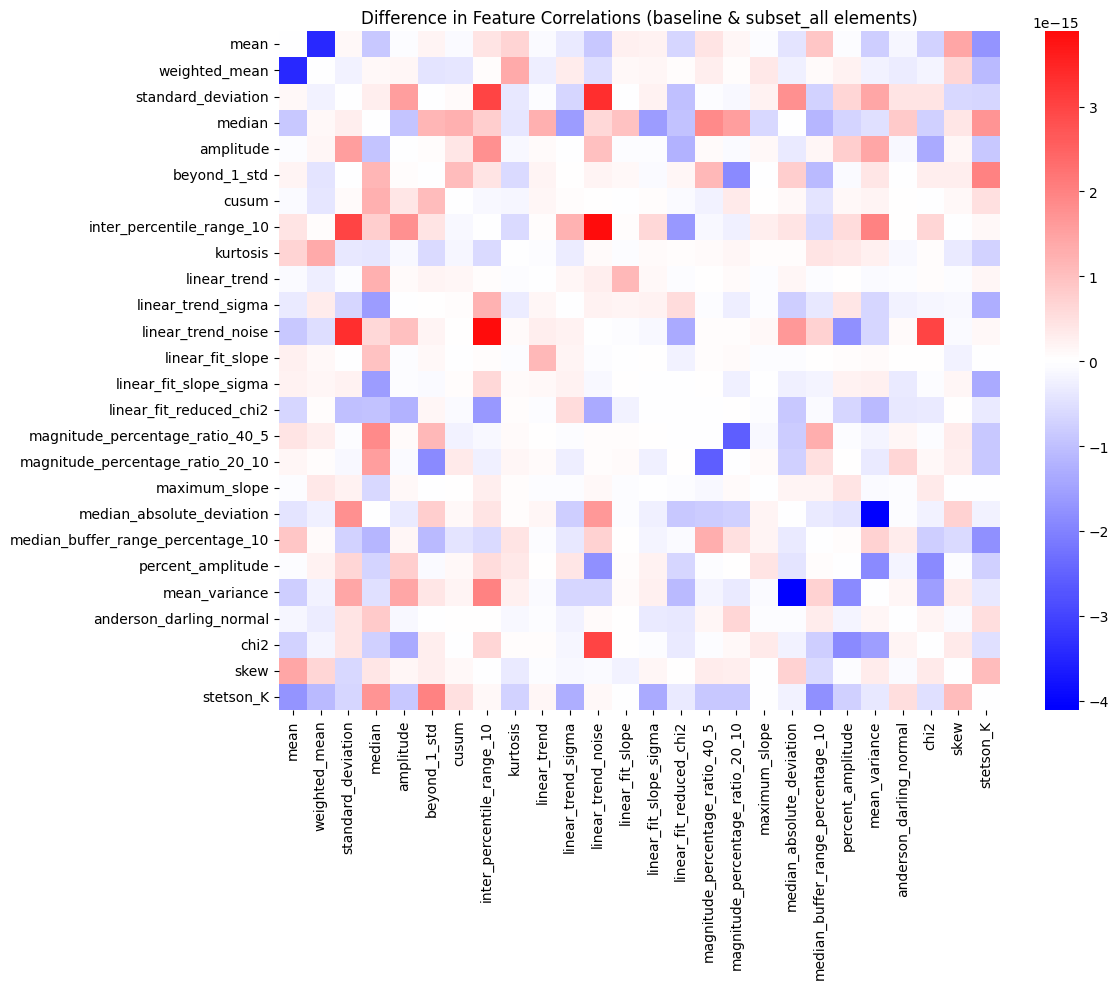

In [72]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_2, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (baseline & subset_all elements)')
plt.tight_layout()
plt.show()


In [73]:
corr_diff_clean = corr_diff_2.copy()
corr_diff_clean[np.abs(corr_diff_clean) < 1e-6] = 0

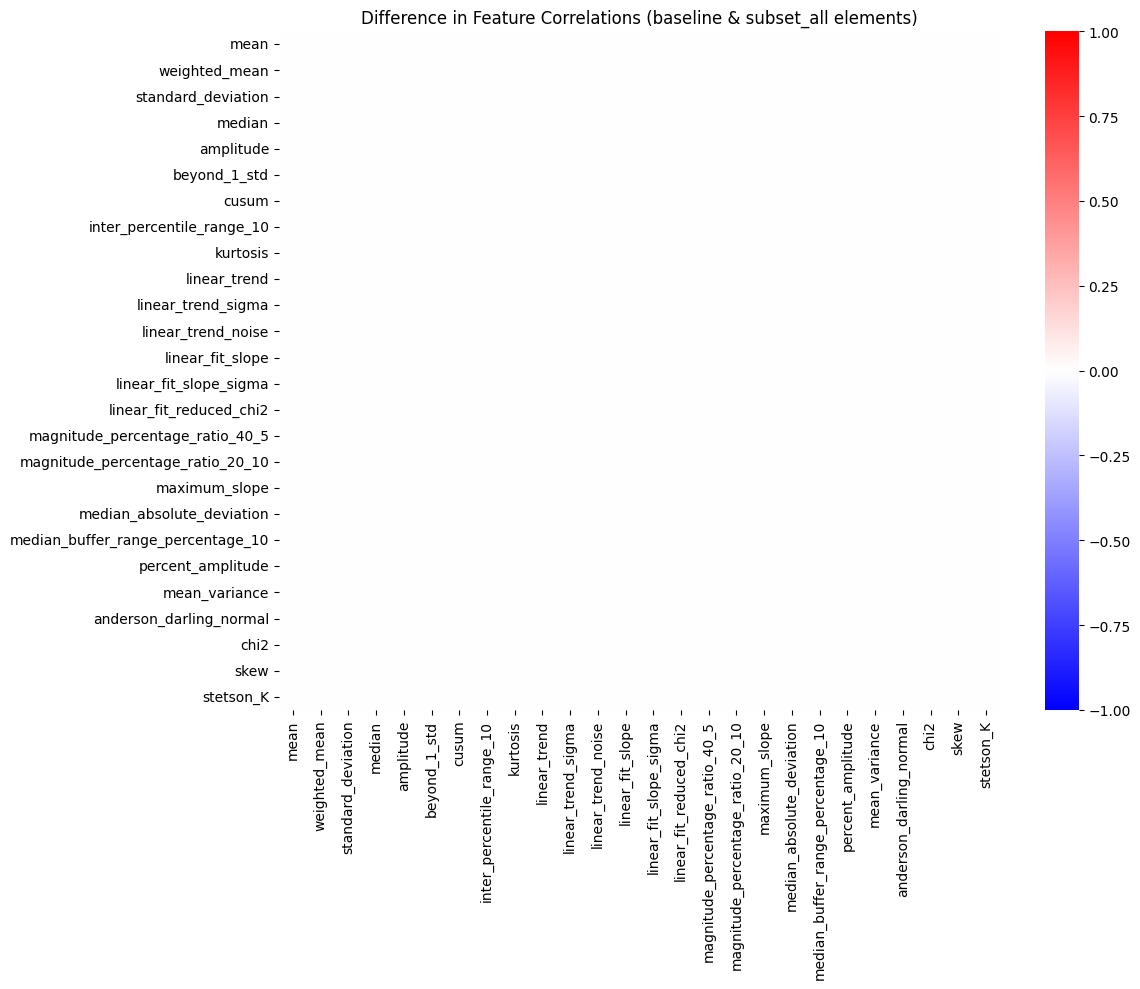

In [74]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean, cmap='bwr', center=0, vmin=-1, vmax=1)
plt.title('Difference in Feature Correlations (baseline & subset_all elements)')
plt.tight_layout()
plt.show()
